In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import os
import matplotlib as mpl

from jupyterthemes import jtplot
jtplot.style(context='talk', fscale=1.1, spines=False, gridlines='--', )


import matplotlib.pyplot as plt

from scipy import stats




av_manifold_df = pd.read_csv('~/Dropbox/loki_0.5/analysis/aggregated_data/av_manifold_df.csv')
fig_path = (os.path.expanduser('~') + '/Dropbox/loki_0.5/figures/')

In [139]:
def plot_a_v_time(data, fig, ax,  conditional=False, savefig=None, all_subs=False, linestyle='-', legend=True, home=os.path.expanduser('~')):

    # jtplot.style(context='talk', fscale=1.3, spines=False, gridlines='--', )


    # hack to get hue to work with lineplots and markers ...

    fig_path=os.path.join(home, 'Dropbox/loki_0.5/figures/av_time_plots')

    import itertools
    n_plotted_trials = data.shifted_epoch_trial.nunique()

    palette_seed = sns.color_palette('Greens', n_colors=200)[80::20]
    
    assert len(palette_seed) >= n_plotted_trials, 'check n_colors for color palette'

    palette = itertools.cycle(palette_seed)

    sns.lineplot(data=data, x='a_est_z', y='v_est_z',
                 hue='shifted_epoch_trial',
                 palette=palette_seed[:n_plotted_trials], marker='o');

    x = data.a_est_z
    y = data.v_est_z

    for i in range(len(data)):
        plt.plot(x.values[i:i+2], y.values[i:i+2], 
                 color=next(palette), linestyle=linestyle, 
                 linewidth=4, label=data.subj_id.unique()[0], 
                alpha=0.6, markersize=10, marker='o')

    if conditional is True:
        plt.title('subject ' + str(int(data.subj_id.unique()[0])) + ': ' +
                '$\lambda =$ ' + str(int(data.lambda_val.unique()[0])) + ' p = ' + str(data.p_optimal.unique()[0]), fontsize=20)
        fig_name = (str(int(data.subj_id.unique()[0])) + '_' + str(int(data.condition.unique()[0])) +'_a_v_time_color.png')
    if all_subs is True:
        fig_name = ('all_conditions_all_subs_a_v_time_color.png')
    else:
        plt.title('subject ' + str(int(data.subj_id.unique()[0])), fontsize=20)
        fig_name = (str(int(data.subj_id.unique()[0])) +'_all_conditions_a_v_time_color.png')


    plt.xlabel(r'Decision threshold ($\hat{a}$)')
    plt.ylabel(r'Drift rate ($\hat{v}$)')

    if legend:
        legend = ax.legend()
        legend.texts[0].set_text("epoch trial")
    else:
        ax.get_legend().remove()


    if savefig:

        plt.savefig(os.path.join(fig_path, fig_name))


    return fig, ax


In [140]:
def plot_a_v_time_mean(data, fig, ax,  conditional=False, savefig=None, all_subs=False, linestyle='-', legend=True, home=os.path.expanduser('~')):

    # jtplot.style(context='talk', fscale=1.3, spines=False, gridlines='--', )


    # hack to get hue to work with lineplots and markers ...

    fig_path=os.path.join(home, 'Dropbox/loki_0.5/figures/av_time_plots')

    import itertools
    n_plotted_trials = data.shifted_epoch_trial.nunique()

    palette_seed = sns.color_palette('Greens', n_colors=200)[80::20]
    
    assert len(palette_seed) >= n_plotted_trials, 'check n_colors for color palette'

    palette = itertools.cycle(palette_seed)

    sns.lineplot(data=data, x='a_est_z', y='v_est_z',
                 hue='shifted_epoch_trial',
                 palette=palette_seed[:n_plotted_trials], marker='o', markersize=5);

    x = data.a_est_z
    y = data.v_est_z

    for i in range(len(data)):
        plt.plot(x.values[i:i+2], y.values[i:i+2], 
                 color=next(palette), linestyle=linestyle, 
                 linewidth=4, 
                alpha=0.6, markersize=10, marker='o')

    

    plt.xlabel(r'Decision threshold ($\hat{a}$)')
    plt.ylabel(r'Drift rate ($\hat{v}$)')

    if legend:
        legend = ax.legend()
        legend.texts[0].set_text("epoch trial")
    else:
        ax.get_legend().remove()


    return fig, ax


In [141]:
av_manifold_df_filt = av_manifold_df.loc[av_manifold_df.shifted_epoch_trial < 4]
sub_mean_av_df = av_manifold_df_filt.groupby(['subj_id', 'shifted_epoch_trial'])[['a_est_z', 'v_est_z']].mean().reset_index() 
grand_mean_av_df = av_manifold_df_filt.groupby(['shifted_epoch_trial'])[['a_est_z', 'v_est_z']].mean().reset_index() 


In [142]:
grand_mean_av_df.shifted_epoch_trial.unique()

array([-1.,  0.,  1.,  2.,  3.])

In [143]:
grand_mean_av_df

,shifted_epoch_trial,a_est_z,v_est_z
0,-1.0,-0.017079,0.384074
1,0.0,-0.015911,0.378305
2,1.0,-0.285800,-0.987324
3,2.0,-0.039530,-0.380835
4,3.0,0.067562,-0.057823


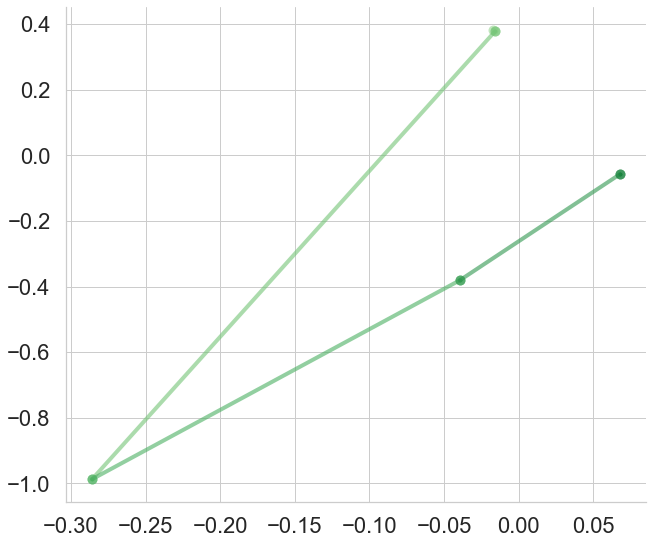

In [144]:
sns.set(font_scale=2, style='whitegrid')  

fig, ax = plt.subplots()
lines = ["-","--","-.",":"]
import itertools
linecycler = itertools.cycle(lines)

plot_a_v_time_mean(grand_mean_av_df, fig, ax, legend=False)

sns.despine()
plt.xlabel('')
plt.ylabel('')
# plt.xticks([])
# plt.yticks([])


plt.savefig(os.path.join(fig_path, 'av_time_loki0.5_mean.png'), dpi=600, bbox_inches='tight', transparent=0)

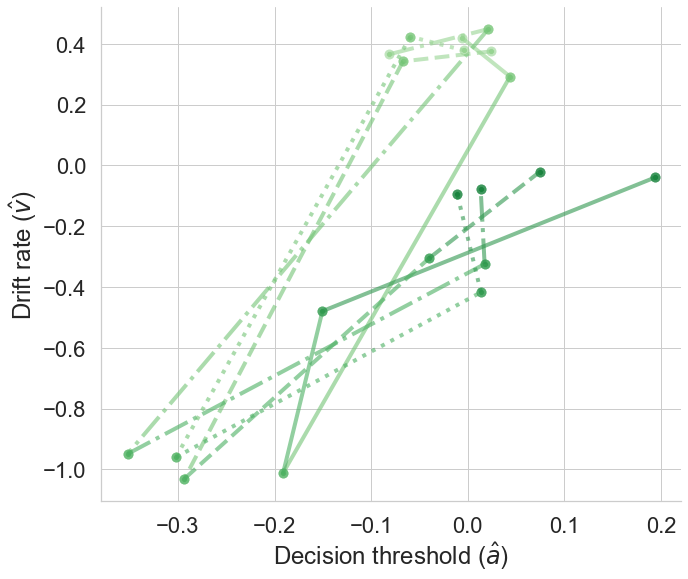

In [145]:
sns.set(font_scale=2, style='whitegrid')  


fig, ax = plt.subplots()
lines = ["-","--","-.",":"]
import itertools
linecycler = itertools.cycle(lines)

# plot_a_v_time(grand_mean_av_df, fig, ax, conditional=False, savefig=True, all_subs=False, linestyle=next(linecycler), legend=False)


for subj_id in mean_av_df.subj_id.unique():

    sub_data = sub_mean_av_df.loc[sub_mean_av_df.subj_id == subj_id].reset_index().copy()

    plot_a_v_time(sub_data, fig, ax, conditional=False, savefig=True, all_subs=True, linestyle=next(linecycler), legend=False)
    
    
sns.despine()

plt.savefig(os.path.join(fig_path, 'av_time_loki0.5.png'), dpi=600, bbox_inches='tight', transparent=0)

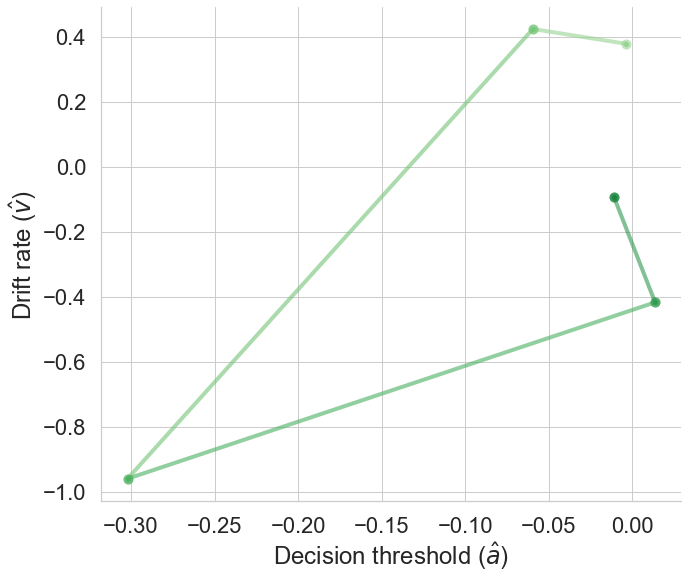

In [146]:
sns.set(font_scale=2, style='whitegrid')  


fig, ax = plt.subplots()
lines = ["-","--","-.",":"]
import itertools
linecycler = itertools.cycle(lines)

# plot_a_v_time(grand_mean_av_df, fig, ax, conditional=False, savefig=True, all_subs=False, linestyle=next(linecycler), legend=False)



sub_data = sub_mean_av_df.loc[sub_mean_av_df.subj_id == subj_id].reset_index().copy()

plot_a_v_time(sub_data, fig, ax, conditional=False, savefig=True, all_subs=True, linestyle=next(linecycler), legend=False)

    
sns.despine()

plt.savefig(os.path.join(fig_path, 'av_time_loki0.5_single_sub.png'), dpi=600, bbox_inches='tight', transparent=0)